(1920, 1080, 3)


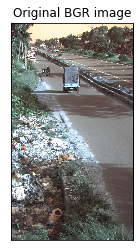

In [117]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
# Load the image
img = cv2.imread("1.jpg")
print(img.shape)
plt.title('Original BGR image')
plt.imshow(img)
plt.xticks([]), plt.yticks([])
plt.show()


(1920, 1080, 3)


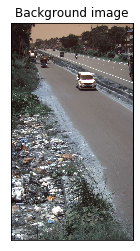

In [118]:
background= cv2.imread("back.jpg")
print(background.shape)
plt.title('Background image')
plt.imshow(background)
plt.xticks([]), plt.yticks([])
plt.show()

In [119]:
#cv2.imshow('original_img',img)
per=50
width= int( (img.shape[1]*per) / 100)
height= int ((img.shape[0]*per) /100 )
dim=(width, height)
img = cv2.resize(img,dim, interpolation = cv2.INTER_AREA)
print(img.shape)
image=img
#cv2.imshow('Resized_img',img)
# Apply log transform
#c= 255/ (np.log(1+np.max(img)))


(960, 540, 3)


In [120]:
#cv2.imshow('original_img',img)
per1=50
width1= int( (background.shape[1]*per) / 100)
height1= int ((background.shape[0]*per) /100 )
dim1=(width1, height1)
background = cv2.resize(background,dim1, interpolation = cv2.INTER_AREA)
print(background.shape)

#cv2.imshow('Resized_img',img)
# Apply log transform
#c= 255/ (np.log(1+np.max(img)))


(960, 540, 3)


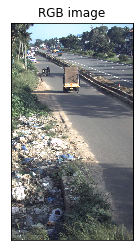

In [121]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.title('RGB image')
plt.imshow(img, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()


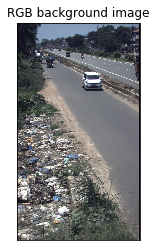

In [122]:
background = cv2.cvtColor(background, cv2.COLOR_BGR2RGB)
plt.title('RGB background image')
plt.imshow(background, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()


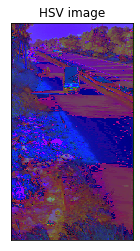

In [123]:
img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
plt.title('HSV image')
plt.imshow(img, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()

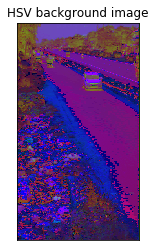

In [124]:
background= cv2.cvtColor(background, cv2.COLOR_RGB2HSV)
plt.title('HSV background image')
plt.imshow(background, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()

In [125]:
H, S, V = cv2.split(img)

BH,BS,BV= cv2.split(background)

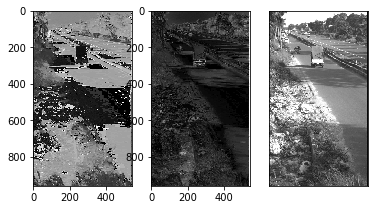

In [147]:

plt.title('HSV components image')
plt.subplot(131)
plt.imshow(H, cmap='gray')
plt.subplot(132)
plt.imshow(S, cmap='gray')
plt.subplot(133)
plt.imshow(V, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()

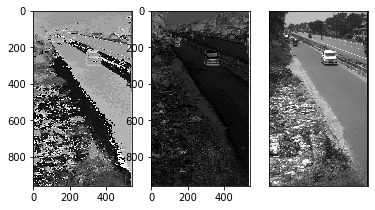

In [148]:

plt.title('HSV components background image')
plt.subplot(131)
plt.imshow(BH, cmap='gray')
plt.subplot(132)
plt.imshow(BS, cmap='gray')
plt.subplot(133)
plt.imshow(BV, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()

In [149]:
print(H.shape)

(960, 540)


In [150]:
alpha1 = 0 ; beta1 = 1 ; thetas= 1 ; thetah= 1
s=V
print(s.shape)


(960, 540)


In [151]:
print(H.min())
V[12,1]/BV[12,1]

0


1.1578947368421053

In [152]:
import sys
V = np.array(V,dtype=np.uint64)
BV = np.array(BV,dtype=np.uint64)

In [156]:
for i in range(H.shape[0]-1):
    for j in range(H.shape[1]-1):
        try:
            x= V[i,j]/ BV[i,j]
        except ZeroDivisionError:
            x = 0
        
        if ( (alpha1 <= x <= beta1) and (abs(S[i,j]-BS[i,j])<= thetas) and (abs(H[i,j]-BH[i,j])<=thetah)) :
            s[i,j]=255
        else:
            s[i,j]=0
            


/home/user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in ubyte_scalars
  


(960, 540)


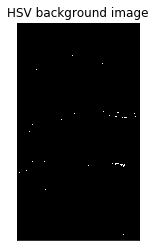

In [157]:
print(s.shape)
s = np.array(s,dtype=np.uint8)
plt.title('HSV background image')
plt.imshow(s, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()

In [158]:
print(s)

[[  0   0   0 ...   0 255  68]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [ 81   0   0 ...   0   0   0]]


In [146]:
print(s==1)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
